In [1]:
import random
import requests
import pandas as pd

r = requests.get("https://pages.cs.wisc.edu/~harter/cs544/data/wi-stations/stations.txt")
r.raise_for_status()
stations = r.text.strip().split("\n")
stations = random.sample(stations, k=10)
workload = random.choices(stations, k=1000, weights=[0.3, 0.2] + [0.5/8]*8)

In [2]:
station = 'USC00478267'
df = pd.read_csv(f"https://pages.cs.wisc.edu/~harter/cs544/data/wi-stations/{station}.csv.gz",
                         names=["station", "date", "element", "value", "m", "q", "s", "obs"])
df.head(3)

C:\Users\R9000P\AppData\Local\Temp\ipykernel_30144\265008605.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"https://pages.cs.wisc.edu/~harter/cs544/data/wi-stations/{station}.csv.gz",


,station,date,element,value,m,q,s,obs
0,USC00478267,19050301,PRCP,0,NaN,NaN,0,NaN
1,USC00478267,19050302,PRCP,0,NaN,NaN,0,NaN
2,USC00478267,19050303,PRCP,0,T,NaN,0,NaN


In [3]:
import time
# FIFO

cache_size = 16
cache = {}   # key=station name, value=DataFrame for that station
evict_order = []     # start of list contains items to be evicted (end of list is freshest)
# TODO: use a faster data struct for evict_order than is not O(N) for pop(0)

# stats
hits = [] # True(hit), False(miss)
ms_latencies = []

def get_station(station):
    start = time.time()
    if station in cache:
        print("hit", end=", ")
        hits.append(True)
        df = cache[station]
    else:
        print("miss", end=", ")
        hits.append(False)
        df = pd.read_csv(f"https://pages.cs.wisc.edu/~harter/cs544/data/wi-stations/{station}.csv.gz",
                             names=["station", "date", "element", "value", "m", "q", "s", "obs"], low_memory=False)

        cache[station] = df
        evict_order.append(station)
        
        # should we evict?
        if len(cache) > cache_size:
            victim = evict_order.pop(0)  # pop from the front
            cache.pop(victim)

    end = time.time()
    ms = (end-start) * 1000
    ms_latencies.append(ms)

    return df

In [4]:
# clear cache
cache = {}
evict_order = []

i = 0

while i < len(workload):
    station = workload[i]
    df = get_station(station)
    i += 1

miss, miss, hit, miss, miss, miss, hit, hit, hit, miss, miss, hit, hit, hit, hit, hit, hit, miss, hit, hit, hit, hit, hit, hit, hit, hit, miss, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, miss, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, 

In [5]:
sum(ms_latencies)

1959.8579406738281

In [6]:
i = 0

while i < len(workload):
    station = workload[i]
    df = get_station(station)
    i += 2

hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, 

In [7]:
sum(ms_latencies)

1961.2934589385986

In [8]:
i = 0

while i < len(workload):
    station = workload[i]
    df = get_station(station)
    i += 4

hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, 

In [9]:
sum(ms_latencies) / len(ms_latencies)

1.1213106427873885

In [10]:
i = 0

while i < len(workload):
    station = workload[i]
    df = get_station(station)
    i += 8

hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, 

In [11]:
sum(ms_latencies) / len(ms_latencies)

1.0465565999348958

In [12]:
i = 0

while i < len(workload):
    station = workload[i]
    df = get_station(station)
    i += 16

hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, 

In [13]:
sum(ms_latencies) / len(ms_latencies)

1.013052967925805

In [14]:
i = 0

while i < len(workload):
    station = workload[i]
    df = get_station(station)
    i += 32

hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, hit, 

In [15]:
sum(ms_latencies) / len(ms_latencies)

0.9965972851980761

In [16]:
strides_average_access_time = {1: 0, 2: 0, 4: 0, 8: 0, 16: 0, 32: 0}
strides_total_access_time = {1: 0, 2: 0, 4: 0, 8: 0, 16: 0, 32: 0}

for stride in strides_average_access_time.keys():
    # initialize random array, limit to the largest possible integer
    arr = [random.randint(0, 2**32) for i in range(2*1024*1024)]

    average_access_time = 0
    total_access_time = 0
    i = 0
    count = 0

    while i < len(arr):
        start = time.time()
        arr[i] *= 3
        end = time.time()
        ns = (end-start) * 1000000000
        total_access_time += ns
        i += stride
        count += 1

    strides_average_access_time[stride] = total_access_time / count
    strides_total_access_time[stride] = total_access_time / 1000000000

In [17]:
strides_average_access_time

{1: 136.45694707520306,
 2: 132.7555310126627,
 4: 144.18765204027295,
 8: 221.32644517114386,
 16: 282.33989723958075,
 32: 349.82076613232493}

In [18]:
strides_total_access_time

{1: 0.28617095947265625,
 2: 0.1392042636871338,
 4: 0.07559585571289062,
 8: 0.058019399642944336,
 16: 0.03700685501098633,
 32: 0.022925853729248047}

C:\Users\R9000P\AppData\Local\Temp\ipykernel_30144\2809229313.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  map_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


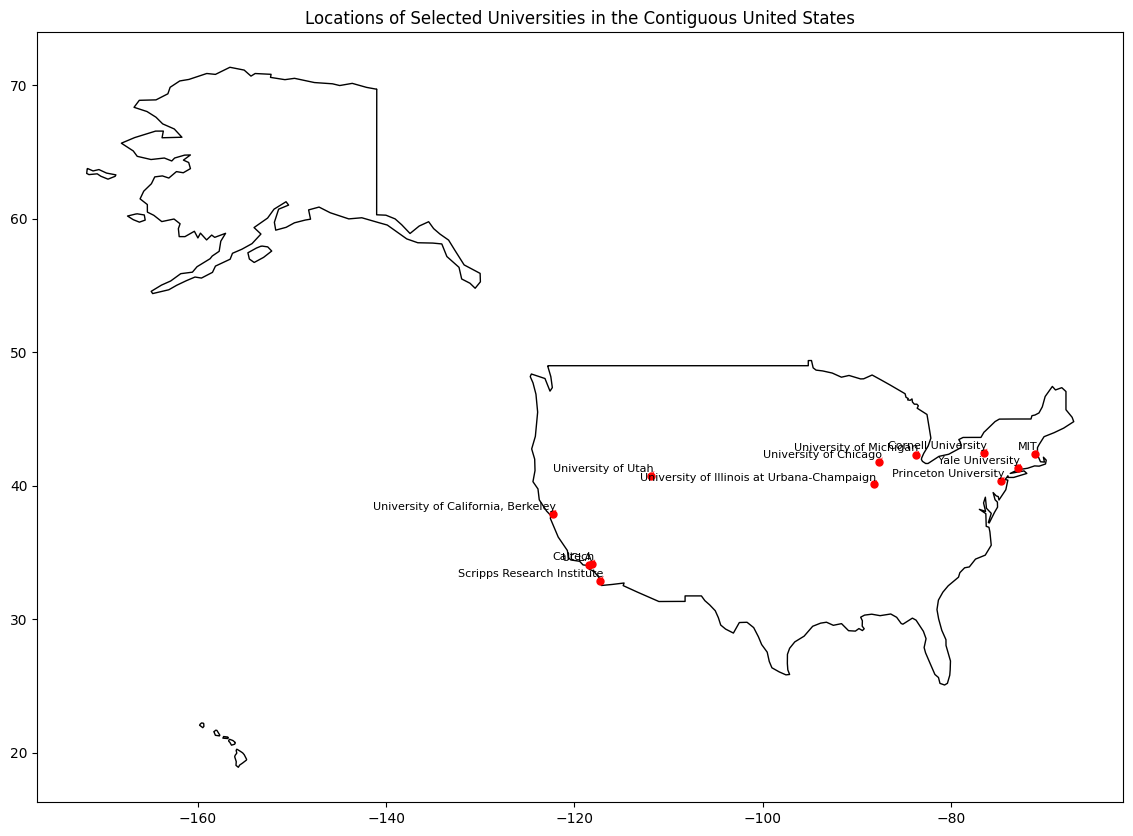

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Predefined coordinates of the universities
coordinates = {
    "Caltech": (34.1377, -118.1253),
    "University of California, Berkeley": (37.8719, -122.2585),
    "MIT": (42.3601, -71.0942),
    "UCLA": (34.0689, -118.4452),
    "Scripps Research Institute": (32.8938, -117.2413),
    "Cornell University": (42.4534, -76.4735),
    "Yale University": (41.3163, -72.9223),
    "Princeton University": (40.3430, -74.6514),
    "University of Chicago": (41.7897, -87.5995),
    "University of Utah": (40.7649, -111.8421),
    "University of Michigan": (42.2780, -83.7382),
    "University of Illinois at Urbana-Champaign": (40.1018, -88.2272)
}

# Read the U.S. map (excluding Alaska and Hawaii)
map_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_data = map_data[(map_data.pop_est > 0) & (map_data.name == "United States of America")]
# exclude Alaska and Hawaii in the multi-polygon
map_data = map_data[~map_data.name.isin(["Alaska", "Hawaii"])]



# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
map_data.plot(ax=ax, color='white', edgecolor='black')

# Add university locations, labels with guiding lines, and state names
for university, (lat, lon) in coordinates.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5)
    # Adjusting label position to avoid overlap
    label_x_offset = 0.3
    label_y_offset = 0.3
    ax.text(lon + label_x_offset, lat + label_y_offset, university, fontsize=8, ha='right')
    ax.plot([lon, lon + label_x_offset], [lat, lat + label_y_offset], color='red', linestyle='-', linewidth=0.5)

ax.set_title("Locations of Selected Universities in the Contiguous United States")
plt.show()

c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.con

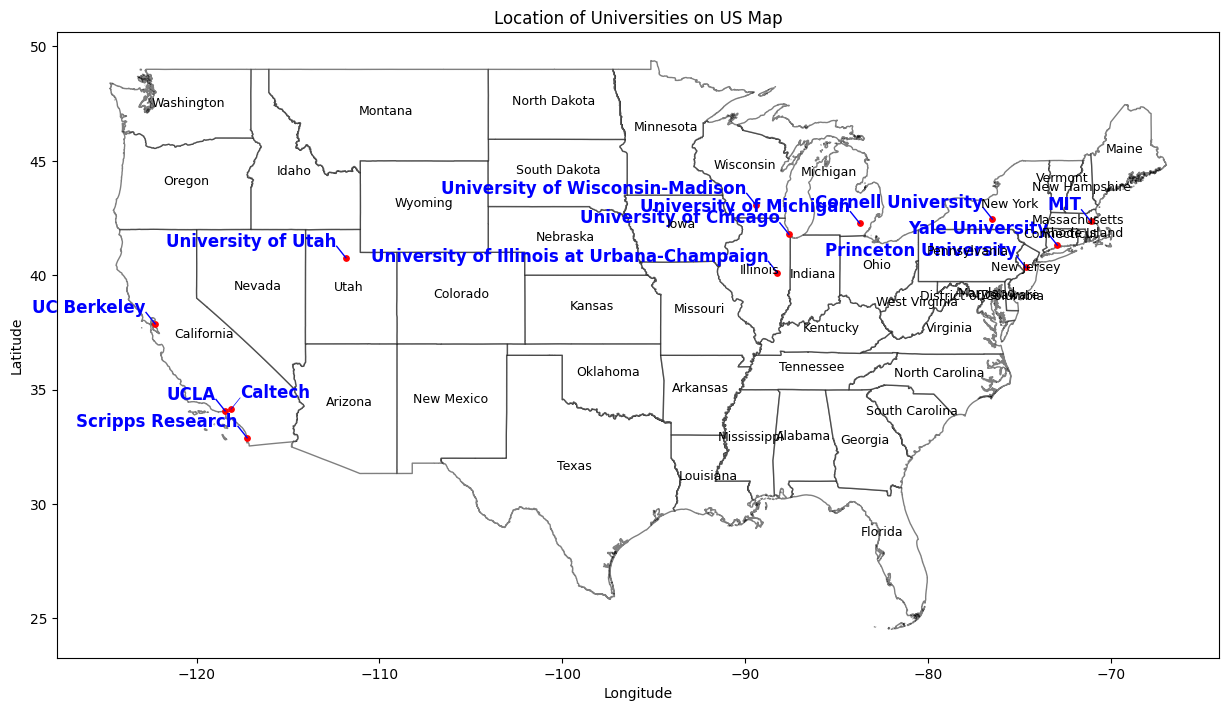

In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
from shapely.geometry import Polygon
import os

# Predefined coordinates for the universities
coordinates = {
    "Caltech": (34.1377, -118.1253),
    "UC Berkeley": (37.8715, -122.2730),
    "MIT": (42.3601, -71.0942),
    "UCLA": (34.0689, -118.4452),
    "Scripps Research": (32.8938, -117.2413),
    "Cornell University": (42.4534, -76.4735),
    "Yale University": (41.3163, -72.9223),
    "Princeton University": (40.3430, -74.6514),
    "University of Chicago": (41.7886, -87.5987),
    "University of Utah": (40.7649, -111.8421),
    "University of Michigan": (42.2780, -83.7382),
    "University of Illinois at Urbana-Champaign": (40.1018, -88.2272),
    "University of Wisconsin-Madison": (43.0760, -89.4125)
}

# Convert to DataFrame
df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'University'}, inplace=True)

# Load the USA map excluding Alaska and Hawaii
usa = gpd.read_file('cb_2022_us_state_500k.shp')
# exclude Alaska and Hawaii in the multi-polygon
# add bounding box for the contiguous USA
usa = usa.clip(box(-125, 20, -65, 50))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
# less transparent
usa.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
plt.scatter(df['Longitude'], df['Latitude'], color='red', marker='o', s=15)

# Adding annotations for each point
for idx, row in df.iterrows():
    if row['University'] == "Caltech":
        # plot on left side, bold font
        label_x_offset = 0.5
        label_y_offset = 0.5
        plt.text(row['Longitude'] + label_x_offset, row['Latitude'] + label_y_offset, row['University'], fontsize=12, color='blue', ha='left', fontdict={'weight': 'bold'})
        # plot a line to the point
        plt.plot([row['Longitude'], row['Longitude'] + label_x_offset], [row['Latitude'], row['Latitude'] + label_y_offset], color='blue', linestyle='-', linewidth=0.5)
    else:
        label_x_offset = -0.5
        label_y_offset = 0.5
        plt.text(row['Longitude'] + label_x_offset, row['Latitude'] + label_y_offset, row['University'], fontsize=12, color='blue', ha='right',  fontdict={'weight': 'bold'})
        plt.plot([row['Longitude'], row['Longitude'] + label_x_offset], [row['Latitude'], row['Latitude'] + label_y_offset], color='blue', linestyle='-', linewidth=1)
    

# plot each state name in the center of the state polygon using centroid
for idx, row in usa.iterrows():
    g = gpd.GeoSeries(row['geometry'])
    centroid = g.centroid
    plt.text(centroid.x, centroid.y, row['NAME'], fontsize=9, ha='center')

plt.title("Location of Universities on US Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# set font to Arial
plt.show()

In [21]:
# gcloud auth application-default login --scopes=openid,https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/drive.readonly
from google.cloud import bigquery
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a BigQuery client
client = bigquery.Client()

# Query to get state boundaries
query = """
SELECT geo_id, state_name, ST_AsText(geometry) as geometry
FROM `bigquery-public-data.geo_us_boundaries.states`
"""
query_job = client.query(query)
results = query_job.result()

# Convert query results to DataFrame
data = []
for row in results:
    data.append({
        'geo_id': row['geo_id'],
        'state_name': row['state_name'],
        'geometry': row['geometry']
    })

state_df = pd.DataFrame(data)

# Convert WKT to Geopandas GeoDataFrame
state_df['geometry'] = gpd.GeoSeries.from_wkt(state_df['geometry'])
gdf_states = gpd.GeoDataFrame(state_df, geometry='geometry')

# Predefined coordinates for universities
universities = {
    # Add your university data here, similar to the previous examples
}

# Convert university data to DataFrame
df_universities = pd.DataFrame(universities).T.reset_index()
df_universities.columns = ['University', 'Latitude', 'Longitude']

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
gdf_states.plot(ax=ax, color='white', edgecolor='black')
plt.scatter(df_universities['Longitude'], df_universities['Latitude'], color='red', marker='o')

# Adding annotations for each university
for idx, row in df_universities.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['University'], fontsize=9)

plt.title("Location of Universities on US Map with State Lines")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# grep this webpage
url = 'https://gflclan.com/topic/2368-csgo-ze-map-list/'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

# find hyperlink with Download in the text
links = soup.find_all('a', string='Download')

# parse the hyperlink into a list of urls
urls = []
path = 'csgo_zombie_maps'
error_urls = []
for link in links:
    urls.append(link['href'])

In [2]:
# multithread download
import concurrent.futures
import requests
import tqdm
import time
import os

path = 'csgo_zombie_maps'
error_urls = []

def download(url, store_path, speed_limit=10*1024*1024):
    # Show download progress
    try:
        r = requests.get(url, stream=True, timeout=5)
    # catch all exceptions put them into error_urls list
        if r.status_code != 200:
            print("Error downloading {}".format(url))
        error_urls.append(url)
    except Exception as e:
        print("Error downloading {}".format(url))
        error_urls.append(url)
        return
    
    
    total_size = int(r.headers.get('content-length', 0))
    block_size = 512*1024  # Size of each chunk to read
    store_path = os.path.join(store_path, url.split('/')[-1])  # Keep the original file name
    
    # Show progress bar
    with tqdm.tqdm(total=total_size, unit='iB', unit_scale=True) as pbar:
        # Overwrite the file if exists
        with open(store_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=block_size):
                f.write(chunk)

                # Calculate the time to sleep to limit the speed
                time_to_sleep = block_size / speed_limit
                time.sleep(time_to_sleep)

                # Update the progress bar
                pbar.update(len(chunk))

# create the directory if not exists
if not os.path.exists(path):
    os.makedirs(path)

# download the files, single thread
for url in urls:
    print("Downloading {}".format(url))
    download(url, path)

100%|██████████| 1.21M/1.21M [00:00<00:00, 5.07MiB/s]


100%|██████████| 27.9M/27.9M [00:03<00:00, 9.25MiB/s]


100%|██████████| 41.7M/41.7M [00:04<00:00, 9.49MiB/s]


100%|██████████| 73.6M/73.6M [00:08<00:00, 9.01MiB/s]


100%|██████████| 10.0M/10.0M [00:01<00:00, 6.56MiB/s]


100%|██████████| 46.8M/46.8M [00:05<00:00, 8.38MiB/s]


100%|██████████| 57.0M/57.0M [00:05<00:00, 9.75MiB/s]


100%|██████████| 47.3M/47.3M [00:05<00:00, 8.83MiB/s]


100%|██████████| 91.7M/91.7M [00:09<00:00, 9.62MiB/s]


100%|██████████| 15.4M/15.4M [00:01<00:00, 8.23MiB/s]


100%|██████████| 63.8M/63.8M [00:06<00:00, 9.30MiB/s]


100%|██████████| 13.1M/13.1M [00:01<00:00, 7.95MiB/s]


100%|██████████| 74.6M/74.6M [00:08<00:00, 9.32MiB/s]


100%|██████████| 20.7M/20.7M [00:02<00:00, 8.04MiB/s]


100%|██████████| 58.7M/58.7M [00:06<00:00, 9.05MiB/s]


100%|██████████| 5.91M/5.91M [00:01<00:00, 5.43MiB/s]


100%|██████████| 13.9M/13.9M [00:02<00:00, 5.26MiB/s]


100%|██████████| 61.3M/61.3M [00:07<00:00, 8.70MiB/s]


100%|██████████| 68.6M/68.6M [00:07<00:00, 9.44MiB/s]


100%|██████████| 89.5M/89.5M [00:09<00:00, 9.04MiB/s]


100%|██████████| 69.0M/69.0M [00:10<00:00, 6.54MiB/s]


100%|██████████| 58.6M/58.6M [00:06<00:00, 8.90MiB/s]


100%|██████████| 70.5M/70.5M [00:07<00:00, 9.29MiB/s]


100%|██████████| 65.6M/65.6M [00:06<00:00, 9.66MiB/s]


100%|██████████| 18.7M/18.7M [00:02<00:00, 6.76MiB/s]


100%|██████████| 11.6M/11.6M [00:02<00:00, 5.59MiB/s]


100%|██████████| 22.0M/22.0M [00:02<00:00, 7.38MiB/s]


100%|██████████| 40.5M/40.5M [00:04<00:00, 8.45MiB/s]


100%|██████████| 5.52M/5.52M [00:00<00:00, 6.60MiB/s]


100%|██████████| 17.8M/17.8M [00:01<00:00, 9.47MiB/s]


100%|██████████| 33.0M/33.0M [00:03<00:00, 8.77MiB/s]


100%|██████████| 5.75M/5.75M [00:00<00:00, 8.25MiB/s]


100%|██████████| 75.7M/75.7M [00:08<00:00, 9.26MiB/s]


100%|██████████| 87.7M/87.7M [00:09<00:00, 9.40MiB/s]


100%|██████████| 41.4M/41.4M [00:04<00:00, 9.24MiB/s]


100%|██████████| 6.95M/6.95M [00:00<00:00, 7.88MiB/s]


100%|██████████| 26.8M/26.8M [00:03<00:00, 8.83MiB/s]


100%|██████████| 60.2M/60.2M [00:06<00:00, 9.57MiB/s]


100%|██████████| 84.2M/84.2M [00:08<00:00, 9.45MiB/s]


100%|██████████| 105M/105M [00:11<00:00, 9.05MiB/s] 


100%|██████████| 50.6M/50.6M [00:05<00:00, 9.39MiB/s]


100%|██████████| 14.2M/14.2M [00:01<00:00, 7.55MiB/s]


100%|██████████| 12.2M/12.2M [00:01<00:00, 7.04MiB/s]


100%|██████████| 51.3M/51.3M [00:05<00:00, 9.28MiB/s]


100%|██████████| 7.80M/7.80M [00:01<00:00, 6.84MiB/s]


100%|██████████| 51.6M/51.6M [00:05<00:00, 9.17MiB/s]


100%|██████████| 52.0M/52.0M [00:05<00:00, 9.31MiB/s]


100%|██████████| 35.9M/35.9M [00:03<00:00, 9.33MiB/s]


100%|██████████| 60.3M/60.3M [00:06<00:00, 9.08MiB/s]


100%|██████████| 98.7M/98.7M [00:10<00:00, 9.06MiB/s]


100%|██████████| 44.2M/44.2M [00:04<00:00, 9.18MiB/s]


100%|██████████| 38.5M/38.5M [00:04<00:00, 9.25MiB/s]


100%|██████████| 42.3M/42.3M [00:04<00:00, 9.35MiB/s]


100%|██████████| 54.2M/54.2M [00:05<00:00, 9.32MiB/s]


100%|██████████| 65.6M/65.6M [00:07<00:00, 8.65MiB/s]


100%|██████████| 54.0M/54.0M [00:06<00:00, 8.87MiB/s]


100%|██████████| 43.8M/43.8M [00:05<00:00, 7.94MiB/s]


100%|██████████| 60.5M/60.5M [00:06<00:00, 9.47MiB/s]


100%|██████████| 89.5M/89.5M [00:09<00:00, 9.28MiB/s]


100%|██████████| 57.6M/57.6M [00:06<00:00, 8.50MiB/s]


100%|██████████| 35.4M/35.4M [00:04<00:00, 8.04MiB/s]


100%|██████████| 53.3M/53.3M [00:05<00:00, 9.44MiB/s]


100%|██████████| 84.0M/84.0M [00:10<00:00, 8.36MiB/s]


100%|██████████| 44.4M/44.4M [00:06<00:00, 7.17MiB/s]


100%|██████████| 5.87M/5.87M [00:01<00:00, 4.95MiB/s]


100%|██████████| 4.43M/4.43M [00:00<00:00, 5.27MiB/s]


100%|██████████| 67.7M/67.7M [00:07<00:00, 9.30MiB/s]


100%|██████████| 4.97M/4.97M [00:00<00:00, 6.24MiB/s]


100%|██████████| 44.0M/44.0M [00:04<00:00, 8.97MiB/s]


100%|██████████| 85.1M/85.1M [00:09<00:00, 9.05MiB/s]


100%|██████████| 21.7M/21.7M [00:03<00:00, 6.78MiB/s]


100%|██████████| 27.9M/27.9M [00:03<00:00, 9.00MiB/s]


100%|██████████| 65.0M/65.0M [00:07<00:00, 9.04MiB/s]


100%|██████████| 41.2M/41.2M [00:04<00:00, 8.95MiB/s]


100%|██████████| 30.7M/30.7M [00:04<00:00, 6.16MiB/s]


100%|██████████| 19.6M/19.6M [00:02<00:00, 8.57MiB/s]


100%|██████████| 57.0M/57.0M [00:06<00:00, 8.82MiB/s]


100%|██████████| 79.5M/79.5M [00:08<00:00, 9.42MiB/s]


100%|██████████| 46.2M/46.2M [00:05<00:00, 9.25MiB/s]


100%|██████████| 42.1M/42.1M [00:04<00:00, 8.71MiB/s]


100%|██████████| 26.0M/26.0M [00:02<00:00, 8.96MiB/s]


100%|██████████| 51.8M/51.8M [00:05<00:00, 9.39MiB/s]


100%|██████████| 41.2M/41.2M [00:04<00:00, 8.66MiB/s]


100%|██████████| 7.13M/7.13M [00:01<00:00, 5.29MiB/s]


100%|██████████| 53.2M/53.2M [00:06<00:00, 7.91MiB/s]


100%|██████████| 67.8M/67.8M [00:07<00:00, 9.16MiB/s]


100%|██████████| 43.8M/43.8M [00:04<00:00, 9.32MiB/s]


100%|██████████| 39.4M/39.4M [00:04<00:00, 9.08MiB/s]


100%|██████████| 115M/115M [00:12<00:00, 9.44MiB/s] 


100%|██████████| 8.24M/8.24M [00:01<00:00, 7.26MiB/s]


100%|██████████| 29.0M/29.0M [00:03<00:00, 8.48MiB/s]


100%|██████████| 36.9M/36.9M [00:04<00:00, 8.88MiB/s]


100%|██████████| 59.2M/59.2M [00:06<00:00, 9.05MiB/s]


100%|██████████| 56.9M/56.9M [00:07<00:00, 7.81MiB/s]


100%|██████████| 43.0M/43.0M [00:04<00:00, 9.49MiB/s]


100%|██████████| 82.6M/82.6M [00:09<00:00, 8.60MiB/s]


100%|██████████| 77.7M/77.7M [00:09<00:00, 7.91MiB/s]


100%|██████████| 41.8M/41.8M [00:04<00:00, 8.95MiB/s]


100%|██████████| 70.1M/70.1M [00:08<00:00, 8.17MiB/s]


100%|██████████| 7.31M/7.31M [00:01<00:00, 5.22MiB/s]


100%|██████████| 65.5M/65.5M [00:06<00:00, 9.62MiB/s]


100%|██████████| 59.0M/59.0M [00:06<00:00, 8.89MiB/s]


100%|██████████| 63.9M/63.9M [00:06<00:00, 9.26MiB/s]


100%|██████████| 58.7M/58.7M [00:07<00:00, 8.11MiB/s]


100%|██████████| 41.8M/41.8M [00:04<00:00, 9.27MiB/s]


100%|██████████| 25.8M/25.8M [00:03<00:00, 8.26MiB/s]


100%|██████████| 95.9M/95.9M [00:09<00:00, 9.60MiB/s]


100%|██████████| 65.6M/65.6M [00:07<00:00, 8.95MiB/s]


100%|██████████| 41.8M/41.8M [00:04<00:00, 8.45MiB/s]


100%|██████████| 19.8M/19.8M [00:02<00:00, 8.75MiB/s]


100%|██████████| 9.28M/9.28M [00:01<00:00, 6.85MiB/s]


100%|██████████| 65.4M/65.4M [00:07<00:00, 9.08MiB/s]


100%|██████████| 16.7M/16.7M [00:03<00:00, 5.15MiB/s]


100%|██████████| 14.5M/14.5M [00:01<00:00, 8.46MiB/s]


100%|██████████| 63.1M/63.1M [00:06<00:00, 9.39MiB/s]


100%|██████████| 70.4M/70.4M [00:07<00:00, 9.14MiB/s]


100%|██████████| 17.0M/17.0M [00:02<00:00, 7.15MiB/s]


100%|██████████| 86.5M/86.5M [00:10<00:00, 8.08MiB/s]


100%|██████████| 73.9M/73.9M [00:07<00:00, 9.51MiB/s]


100%|██████████| 101M/101M [00:10<00:00, 9.79MiB/s] 


100%|██████████| 61.5M/61.5M [00:06<00:00, 9.28MiB/s]


100%|██████████| 77.1M/77.1M [00:07<00:00, 9.66MiB/s]


100%|██████████| 23.9M/23.9M [00:02<00:00, 9.06MiB/s]


100%|██████████| 82.3M/82.3M [00:08<00:00, 9.70MiB/s]


100%|██████████| 85.4M/85.4M [00:09<00:00, 8.70MiB/s]


100%|██████████| 49.5M/49.5M [00:05<00:00, 9.22MiB/s]


100%|██████████| 76.9M/76.9M [00:07<00:00, 9.70MiB/s]


100%|██████████| 14.5M/14.5M [00:01<00:00, 9.42MiB/s]


100%|██████████| 5.28M/5.28M [00:00<00:00, 6.11MiB/s]


100%|██████████| 55.4M/55.4M [00:06<00:00, 8.24MiB/s]


100%|██████████| 41.2M/41.2M [00:04<00:00, 9.42MiB/s]


100%|██████████| 49.9M/49.9M [00:05<00:00, 9.72MiB/s]


100%|██████████| 16.2M/16.2M [00:01<00:00, 8.65MiB/s]


100%|██████████| 13.4M/13.4M [00:01<00:00, 8.30MiB/s]


100%|██████████| 55.1M/55.1M [00:05<00:00, 9.84MiB/s]


100%|██████████| 5.48M/5.48M [00:00<00:00, 5.52MiB/s]


100%|██████████| 34.8M/34.8M [00:03<00:00, 9.14MiB/s]


100%|██████████| 74.9M/74.9M [00:07<00:00, 9.51MiB/s]


100%|██████████| 29.0M/29.0M [00:03<00:00, 8.70MiB/s]


100%|██████████| 54.3M/54.3M [00:06<00:00, 8.38MiB/s]


100%|██████████| 29.5M/29.5M [00:03<00:00, 8.90MiB/s]


100%|██████████| 9.73M/9.73M [00:01<00:00, 7.56MiB/s]


100%|██████████| 16.6M/16.6M [00:02<00:00, 8.00MiB/s]


100%|██████████| 18.2M/18.2M [00:02<00:00, 8.24MiB/s]


100%|██████████| 24.5M/24.5M [00:02<00:00, 8.74MiB/s]


100%|██████████| 60.0M/60.0M [00:06<00:00, 9.87MiB/s]


100%|██████████| 110M/110M [00:11<00:00, 9.37MiB/s] 


100%|██████████| 81.8M/81.8M [00:08<00:00, 9.28MiB/s]


100%|██████████| 27.7M/27.7M [00:02<00:00, 9.74MiB/s]


100%|██████████| 78.3M/78.3M [00:10<00:00, 7.29MiB/s]


100%|██████████| 19.8M/19.8M [00:02<00:00, 8.34MiB/s]


100%|██████████| 66.0M/66.0M [00:07<00:00, 9.14MiB/s]


100%|██████████| 41.3M/41.3M [00:04<00:00, 9.08MiB/s]


100%|██████████| 67.7M/67.7M [00:07<00:00, 9.48MiB/s]


100%|██████████| 51.6M/51.6M [00:05<00:00, 9.34MiB/s]


100%|██████████| 70.9M/70.9M [00:07<00:00, 9.61MiB/s]


100%|██████████| 17.4M/17.4M [00:02<00:00, 7.84MiB/s]


100%|██████████| 60.0M/60.0M [00:06<00:00, 8.94MiB/s]


100%|██████████| 64.3M/64.3M [00:06<00:00, 9.68MiB/s]


100%|██████████| 75.7M/75.7M [00:08<00:00, 9.15MiB/s]


Error downloading https://fastdlv2.gflclan.com/file/gflfastdlv2/csgo/maps/ze_ffvii_cosmo_canyon_v6test5.bsp


94.0iB [00:00, 1.82kiB/s]


100%|██████████| 73.3M/73.3M [00:08<00:00, 8.86MiB/s]


100%|██████████| 96.6M/96.6M [00:10<00:00, 9.56MiB/s]


100%|██████████| 77.8M/77.8M [00:08<00:00, 8.96MiB/s]


100%|██████████| 68.8M/68.8M [00:07<00:00, 9.52MiB/s]


100%|██████████| 92.2M/92.2M [00:10<00:00, 9.11MiB/s]


100%|██████████| 68.0M/68.0M [00:07<00:00, 9.58MiB/s]


100%|██████████| 85.5M/85.5M [00:08<00:00, 9.59MiB/s]


100%|██████████| 88.3M/88.3M [00:09<00:00, 9.63MiB/s]


100%|██████████| 63.5M/63.5M [00:06<00:00, 9.30MiB/s]


100%|██████████| 86.0M/86.0M [00:09<00:00, 9.45MiB/s]


100%|██████████| 73.9M/73.9M [00:08<00:00, 9.22MiB/s]


100%|██████████| 72.5M/72.5M [00:07<00:00, 9.27MiB/s]


100%|██████████| 72.7M/72.7M [00:07<00:00, 9.34MiB/s]


100%|██████████| 77.2M/77.2M [00:08<00:00, 9.48MiB/s]


100%|██████████| 80.1M/80.1M [00:08<00:00, 9.23MiB/s]


100%|██████████| 24.4M/24.4M [00:02<00:00, 8.97MiB/s]


100%|██████████| 20.2M/20.2M [00:02<00:00, 8.20MiB/s]


100%|██████████| 44.4M/44.4M [00:05<00:00, 8.81MiB/s]


100%|██████████| 45.1M/45.1M [00:04<00:00, 9.07MiB/s]


100%|██████████| 29.9M/29.9M [00:03<00:00, 9.02MiB/s]


100%|██████████| 32.7M/32.7M [00:04<00:00, 7.86MiB/s]


100%|██████████| 45.5M/45.5M [00:04<00:00, 9.37MiB/s]


100%|██████████| 10.5M/10.5M [00:01<00:00, 7.61MiB/s]


100%|██████████| 85.1M/85.1M [00:08<00:00, 9.69MiB/s]


100%|██████████| 77.6M/77.6M [00:08<00:00, 9.58MiB/s]


100%|██████████| 1.62M/1.62M [00:00<00:00, 3.65MiB/s]


100%|██████████| 36.2M/36.2M [00:03<00:00, 9.16MiB/s]


100%|██████████| 48.3M/48.3M [00:05<00:00, 8.70MiB/s]


100%|██████████| 23.2M/23.2M [00:02<00:00, 8.85MiB/s]


100%|██████████| 91.9M/91.9M [00:09<00:00, 9.72MiB/s]


100%|██████████| 67.7M/67.7M [00:07<00:00, 9.19MiB/s]


100%|██████████| 15.0M/15.0M [00:01<00:00, 8.22MiB/s]


100%|██████████| 72.7M/72.7M [00:07<00:00, 9.67MiB/s]


100%|██████████| 19.0M/19.0M [00:02<00:00, 8.74MiB/s]


100%|██████████| 78.8M/78.8M [00:08<00:00, 9.55MiB/s]


100%|██████████| 75.5M/75.5M [00:07<00:00, 9.57MiB/s]


100%|██████████| 26.3M/26.3M [00:02<00:00, 9.35MiB/s]


100%|██████████| 33.2M/33.2M [00:04<00:00, 7.89MiB/s]


100%|██████████| 22.4M/22.4M [00:02<00:00, 8.70MiB/s]


100%|██████████| 27.0M/27.0M [00:03<00:00, 7.36MiB/s]


100%|██████████| 79.7M/79.7M [00:08<00:00, 9.24MiB/s]


100%|██████████| 30.1M/30.1M [00:03<00:00, 8.91MiB/s]


100%|██████████| 59.3M/59.3M [00:06<00:00, 9.39MiB/s]


100%|██████████| 79.0M/79.0M [00:08<00:00, 9.27MiB/s]


100%|██████████| 77.7M/77.7M [00:08<00:00, 9.43MiB/s]


100%|██████████| 27.5M/27.5M [00:03<00:00, 8.95MiB/s]


100%|██████████| 29.2M/29.2M [00:03<00:00, 7.83MiB/s]


100%|██████████| 63.6M/63.6M [00:06<00:00, 9.40MiB/s]


100%|██████████| 366M/366M [00:37<00:00, 9.74MiB/s] 


100%|██████████| 13.0M/13.0M [00:01<00:00, 8.23MiB/s]


100%|██████████| 14.0M/14.0M [00:01<00:00, 8.53MiB/s]


100%|██████████| 2.52M/2.52M [00:00<00:00, 4.62MiB/s]


100%|██████████| 14.6M/14.6M [00:02<00:00, 7.21MiB/s]


100%|██████████| 13.2M/13.2M [00:01<00:00, 7.38MiB/s]


100%|██████████| 44.5M/44.5M [00:04<00:00, 9.38MiB/s]


100%|██████████| 11.2M/11.2M [00:01<00:00, 7.23MiB/s]


100%|██████████| 7.79M/7.79M [00:01<00:00, 6.72MiB/s]


100%|██████████| 51.6M/51.6M [00:06<00:00, 8.55MiB/s]


100%|██████████| 44.6M/44.6M [00:05<00:00, 8.65MiB/s]


100%|██████████| 26.8M/26.8M [00:03<00:00, 8.69MiB/s]


100%|██████████| 85.1M/85.1M [00:09<00:00, 9.25MiB/s]


100%|██████████| 52.8M/52.8M [00:05<00:00, 9.28MiB/s]


100%|██████████| 33.5M/33.5M [00:03<00:00, 8.78MiB/s]


100%|██████████| 28.6M/28.6M [00:03<00:00, 8.95MiB/s]


100%|██████████| 10.8M/10.8M [00:01<00:00, 7.23MiB/s]


100%|██████████| 16.4M/16.4M [00:02<00:00, 7.41MiB/s]


100%|██████████| 107M/107M [00:11<00:00, 9.31MiB/s] 


100%|██████████| 19.7M/19.7M [00:02<00:00, 8.78MiB/s]


100%|██████████| 39.8M/39.8M [00:04<00:00, 9.31MiB/s]


100%|██████████| 54.5M/54.5M [00:05<00:00, 9.37MiB/s]


100%|██████████| 33.8M/33.8M [00:03<00:00, 9.10MiB/s]


100%|██████████| 74.4M/74.4M [00:07<00:00, 9.46MiB/s]


100%|██████████| 56.1M/56.1M [00:05<00:00, 9.49MiB/s]


100%|██████████| 35.4M/35.4M [00:03<00:00, 9.13MiB/s]


100%|██████████| 24.4M/24.4M [00:02<00:00, 8.38MiB/s]


100%|██████████| 49.0M/49.0M [00:05<00:00, 9.15MiB/s]


100%|██████████| 7.10M/7.10M [00:01<00:00, 6.06MiB/s]


100%|██████████| 75.2M/75.2M [00:08<00:00, 9.36MiB/s]


100%|██████████| 34.2M/34.2M [00:03<00:00, 9.17MiB/s]


100%|██████████| 55.4M/55.4M [00:05<00:00, 9.50MiB/s]


100%|██████████| 45.5M/45.5M [00:05<00:00, 9.06MiB/s]


100%|██████████| 11.3M/11.3M [00:01<00:00, 6.15MiB/s]


100%|██████████| 27.6M/27.6M [00:03<00:00, 8.40MiB/s]


100%|██████████| 288k/288k [00:00<00:00, 1.68MiB/s]


100%|██████████| 71.6M/71.6M [00:07<00:00, 9.39MiB/s]


100%|██████████| 64.5M/64.5M [00:07<00:00, 9.18MiB/s]


100%|██████████| 72.3M/72.3M [00:07<00:00, 9.66MiB/s]


100%|██████████| 36.0M/36.0M [00:04<00:00, 8.80MiB/s]


100%|██████████| 77.5M/77.5M [00:08<00:00, 9.45MiB/s]


100%|██████████| 55.6M/55.6M [00:05<00:00, 9.53MiB/s]


100%|██████████| 57.4M/57.4M [00:06<00:00, 9.18MiB/s]


100%|██████████| 57.5M/57.5M [00:06<00:00, 9.54MiB/s]


100%|██████████| 10.5M/10.5M [00:01<00:00, 7.13MiB/s]


100%|██████████| 12.3M/12.3M [00:01<00:00, 8.24MiB/s]


100%|██████████| 1.76M/1.76M [00:00<00:00, 3.84MiB/s]


100%|██████████| 5.67M/5.67M [00:00<00:00, 6.74MiB/s]


100%|██████████| 23.7M/23.7M [00:02<00:00, 8.82MiB/s]


100%|██████████| 60.4M/60.4M [00:06<00:00, 9.50MiB/s]


100%|██████████| 72.9M/72.9M [00:07<00:00, 9.63MiB/s]


100%|██████████| 54.9M/54.9M [00:06<00:00, 8.96MiB/s]


100%|██████████| 13.4M/13.4M [00:01<00:00, 6.86MiB/s]


100%|██████████| 30.9M/30.9M [00:03<00:00, 8.32MiB/s]


100%|██████████| 96.5M/96.5M [00:10<00:00, 9.50MiB/s]


100%|██████████| 10.3M/10.3M [00:01<00:00, 7.96MiB/s]


100%|██████████| 91.4M/91.4M [00:09<00:00, 9.71MiB/s]


100%|██████████| 85.5M/85.5M [00:09<00:00, 9.16MiB/s]


100%|██████████| 30.7M/30.7M [00:03<00:00, 7.72MiB/s]


100%|██████████| 75.1M/75.1M [00:07<00:00, 9.52MiB/s]


100%|██████████| 19.1M/19.1M [00:02<00:00, 8.84MiB/s]


100%|██████████| 14.3M/14.3M [00:01<00:00, 8.36MiB/s]


100%|██████████| 31.7M/31.7M [00:03<00:00, 9.08MiB/s]


100%|██████████| 50.9M/50.9M [00:05<00:00, 9.25MiB/s]


100%|██████████| 9.63M/9.63M [00:01<00:00, 7.10MiB/s]


100%|██████████| 43.3M/43.3M [00:05<00:00, 8.41MiB/s]


100%|██████████| 37.7M/37.7M [00:04<00:00, 9.41MiB/s]


100%|██████████| 12.5M/12.5M [00:01<00:00, 8.35MiB/s]


100%|██████████| 21.6M/21.6M [00:02<00:00, 7.96MiB/s]


100%|██████████| 81.1M/81.1M [00:08<00:00, 9.71MiB/s]


100%|██████████| 45.3M/45.3M [00:04<00:00, 9.17MiB/s]


100%|██████████| 24.6M/24.6M [00:02<00:00, 8.29MiB/s]


100%|██████████| 79.8M/79.8M [00:08<00:00, 9.68MiB/s]


100%|██████████| 49.1M/49.1M [00:05<00:00, 9.51MiB/s]


100%|██████████| 14.2M/14.2M [00:01<00:00, 7.25MiB/s]


100%|██████████| 33.1M/33.1M [00:03<00:00, 9.06MiB/s]


100%|██████████| 43.8M/43.8M [00:04<00:00, 9.15MiB/s]


100%|██████████| 47.4M/47.4M [00:05<00:00, 9.12MiB/s]


100%|██████████| 69.1M/69.1M [00:07<00:00, 9.50MiB/s]


100%|██████████| 28.4M/28.4M [00:03<00:00, 8.97MiB/s]


100%|██████████| 59.0M/59.0M [00:06<00:00, 9.31MiB/s]


100%|██████████| 97.8M/97.8M [00:10<00:00, 9.27MiB/s]


100%|██████████| 61.4M/61.4M [00:06<00:00, 9.57MiB/s]


100%|██████████| 82.3M/82.3M [00:08<00:00, 9.27MiB/s]


100%|██████████| 33.9M/33.9M [00:03<00:00, 9.07MiB/s]


100%|██████████| 5.02M/5.02M [00:00<00:00, 6.59MiB/s]


100%|██████████| 32.0M/32.0M [00:03<00:00, 9.27MiB/s]


100%|██████████| 77.4M/77.4M [00:08<00:00, 9.62MiB/s]


100%|██████████| 21.5M/21.5M [00:02<00:00, 7.89MiB/s]


100%|██████████| 8.76M/8.76M [00:01<00:00, 7.75MiB/s]


100%|██████████| 76.4M/76.4M [00:07<00:00, 9.66MiB/s]


100%|██████████| 6.37M/6.37M [00:00<00:00, 6.82MiB/s]


100%|██████████| 3.38M/3.38M [00:00<00:00, 5.86MiB/s]


100%|██████████| 61.0M/61.0M [00:06<00:00, 9.65MiB/s]


100%|██████████| 39.7M/39.7M [00:04<00:00, 8.73MiB/s]


100%|██████████| 10.8M/10.8M [00:01<00:00, 6.24MiB/s]


100%|██████████| 50.2M/50.2M [00:05<00:00, 9.55MiB/s]


100%|██████████| 37.5M/37.5M [00:04<00:00, 9.05MiB/s]


100%|██████████| 59.5M/59.5M [00:06<00:00, 9.20MiB/s]


100%|██████████| 13.4M/13.4M [00:01<00:00, 8.05MiB/s]


100%|██████████| 56.4M/56.4M [00:05<00:00, 9.61MiB/s]


100%|██████████| 20.3M/20.3M [00:02<00:00, 8.82MiB/s]


100%|██████████| 62.8M/62.8M [00:06<00:00, 9.40MiB/s]


100%|██████████| 55.6M/55.6M [00:06<00:00, 9.14MiB/s]


100%|██████████| 92.5M/92.5M [00:09<00:00, 9.47MiB/s]


100%|██████████| 68.4M/68.4M [00:07<00:00, 9.46MiB/s]


100%|██████████| 16.5M/16.5M [00:02<00:00, 8.18MiB/s]


100%|██████████| 6.24M/6.24M [00:00<00:00, 6.49MiB/s]


100%|██████████| 12.3M/12.3M [00:01<00:00, 7.82MiB/s]


100%|██████████| 19.3M/19.3M [00:02<00:00, 8.77MiB/s]


100%|██████████| 96.5M/96.5M [00:10<00:00, 9.56MiB/s]


100%|██████████| 71.7M/71.7M [00:07<00:00, 9.72MiB/s]


100%|██████████| 7.95M/7.95M [00:01<00:00, 7.18MiB/s]


100%|██████████| 62.2M/62.2M [00:06<00:00, 9.45MiB/s]


100%|██████████| 56.2M/56.2M [00:06<00:00, 9.31MiB/s]


100%|██████████| 60.1M/60.1M [00:06<00:00, 9.67MiB/s]


100%|██████████| 24.8M/24.8M [00:03<00:00, 8.11MiB/s]


100%|██████████| 25.7M/25.7M [00:03<00:00, 8.45MiB/s]


100%|██████████| 47.4M/47.4M [00:04<00:00, 9.54MiB/s]


100%|██████████| 52.2M/52.2M [00:05<00:00, 9.37MiB/s]


100%|██████████| 20.4M/20.4M [00:02<00:00, 9.03MiB/s]


100%|██████████| 12.3M/12.3M [00:01<00:00, 7.28MiB/s]


100%|██████████| 72.3M/72.3M [00:07<00:00, 9.56MiB/s]


100%|██████████| 41.7M/41.7M [00:04<00:00, 8.85MiB/s]


100%|██████████| 57.4M/57.4M [00:05<00:00, 9.65MiB/s]


100%|██████████| 57.0M/57.0M [00:05<00:00, 9.64MiB/s]


100%|██████████| 67.9M/67.9M [00:07<00:00, 9.60MiB/s]


100%|██████████| 25.4M/25.4M [00:02<00:00, 9.05MiB/s]


100%|██████████| 16.7M/16.7M [00:02<00:00, 7.11MiB/s]


100%|██████████| 64.5M/64.5M [00:06<00:00, 9.33MiB/s]


100%|██████████| 15.2M/15.2M [00:02<00:00, 7.45MiB/s]


100%|██████████| 15.3M/15.3M [00:01<00:00, 7.99MiB/s]


100%|██████████| 63.6M/63.6M [00:06<00:00, 9.30MiB/s]


100%|██████████| 85.4M/85.4M [00:09<00:00, 9.28MiB/s]


100%|██████████| 20.9M/20.9M [00:02<00:00, 8.57MiB/s]


100%|██████████| 37.4M/37.4M [00:04<00:00, 8.90MiB/s]


100%|██████████| 16.2M/16.2M [00:02<00:00, 8.00MiB/s]


100%|██████████| 54.9M/54.9M [00:05<00:00, 9.43MiB/s]


100%|██████████| 47.1M/47.1M [00:05<00:00, 9.00MiB/s]


100%|██████████| 53.1M/53.1M [00:06<00:00, 7.62MiB/s]


100%|██████████| 74.8M/74.8M [00:08<00:00, 9.28MiB/s]


100%|██████████| 14.9M/14.9M [00:02<00:00, 5.68MiB/s]


100%|██████████| 15.6M/15.6M [00:02<00:00, 7.33MiB/s]


Error downloading https://fastdlv2.gflclan.com/file/gflfastdlv2/csgo/maps/ze_opti_variety_missons_p3.bsp.bz2


94.0iB [00:00, 1.82kiB/s]


100%|██████████| 80.0M/80.0M [00:08<00:00, 9.70MiB/s]


100%|██████████| 36.4M/36.4M [00:03<00:00, 9.14MiB/s]


100%|██████████| 55.7M/55.7M [00:05<00:00, 9.52MiB/s]


100%|██████████| 29.5M/29.5M [00:03<00:00, 7.93MiB/s]


100%|██████████| 90.4M/90.4M [00:09<00:00, 9.09MiB/s]


100%|██████████| 43.8M/43.8M [00:05<00:00, 8.64MiB/s]


100%|██████████| 70.4M/70.4M [00:07<00:00, 8.85MiB/s]


100%|██████████| 49.9M/49.9M [00:05<00:00, 8.72MiB/s]


100%|██████████| 81.7M/81.7M [00:08<00:00, 9.57MiB/s]


100%|██████████| 55.6M/55.6M [00:05<00:00, 9.58MiB/s]


100%|██████████| 53.9M/53.9M [00:05<00:00, 9.16MiB/s]


100%|██████████| 14.2M/14.2M [00:01<00:00, 8.02MiB/s]


100%|██████████| 48.7M/48.7M [00:05<00:00, 9.05MiB/s]


100%|██████████| 22.5M/22.5M [00:02<00:00, 8.58MiB/s]


100%|██████████| 14.4M/14.4M [00:01<00:00, 8.48MiB/s]


100%|██████████| 21.7M/21.7M [00:02<00:00, 8.24MiB/s]


100%|██████████| 63.4M/63.4M [00:06<00:00, 9.67MiB/s]


100%|██████████| 63.3M/63.3M [00:06<00:00, 9.30MiB/s]


100%|██████████| 13.6M/13.6M [00:01<00:00, 7.76MiB/s]


100%|██████████| 82.4M/82.4M [00:08<00:00, 9.71MiB/s]


100%|██████████| 66.1M/66.1M [00:06<00:00, 9.54MiB/s]


100%|██████████| 17.9M/17.9M [00:02<00:00, 8.63MiB/s]


100%|██████████| 52.6M/52.6M [00:05<00:00, 9.15MiB/s]


100%|██████████| 21.6M/21.6M [00:02<00:00, 7.85MiB/s]


100%|██████████| 76.7M/76.7M [00:08<00:00, 9.44MiB/s]


100%|██████████| 56.1M/56.1M [00:05<00:00, 9.55MiB/s]


100%|██████████| 33.3M/33.3M [00:03<00:00, 9.36MiB/s]


100%|██████████| 38.7M/38.7M [00:04<00:00, 9.26MiB/s]


100%|██████████| 33.4M/33.4M [00:03<00:00, 9.30MiB/s]


100%|██████████| 32.1M/32.1M [00:03<00:00, 8.60MiB/s]


100%|██████████| 73.4M/73.4M [00:07<00:00, 9.71MiB/s]


100%|██████████| 46.9M/46.9M [00:05<00:00, 9.01MiB/s]


100%|██████████| 52.8M/52.8M [00:05<00:00, 9.60MiB/s]


100%|██████████| 42.9M/42.9M [00:04<00:00, 8.91MiB/s]


100%|██████████| 39.5M/39.5M [00:04<00:00, 9.36MiB/s]


100%|██████████| 8.49M/8.49M [00:01<00:00, 7.36MiB/s]


100%|██████████| 72.4M/72.4M [00:07<00:00, 9.47MiB/s]


100%|██████████| 11.6M/11.6M [00:01<00:00, 8.00MiB/s]


100%|██████████| 59.5M/59.5M [00:06<00:00, 9.61MiB/s]


100%|██████████| 22.8M/22.8M [00:02<00:00, 8.85MiB/s]


100%|██████████| 22.0M/22.0M [00:02<00:00, 8.25MiB/s]


100%|██████████| 76.9M/76.9M [00:09<00:00, 8.07MiB/s]


100%|██████████| 69.2M/69.2M [00:08<00:00, 8.03MiB/s]


100%|██████████| 49.8M/49.8M [00:05<00:00, 8.35MiB/s]


100%|██████████| 82.9M/82.9M [00:11<00:00, 7.32MiB/s]


100%|██████████| 36.3M/36.3M [00:06<00:00, 5.29MiB/s]


100%|██████████| 29.4M/29.4M [00:03<00:00, 8.04MiB/s]


100%|██████████| 32.2M/32.2M [00:04<00:00, 7.54MiB/s]


100%|██████████| 31.6M/31.6M [00:04<00:00, 7.76MiB/s]


100%|██████████| 32.0M/32.0M [00:04<00:00, 7.61MiB/s]


100%|██████████| 54.3M/54.3M [00:05<00:00, 9.56MiB/s]


100%|██████████| 22.3M/22.3M [00:02<00:00, 8.08MiB/s]


100%|██████████| 85.2M/85.2M [00:10<00:00, 8.20MiB/s]


100%|██████████| 5.92M/5.92M [00:00<00:00, 6.47MiB/s]


100%|██████████| 12.5M/12.5M [00:01<00:00, 6.75MiB/s]


100%|██████████| 11.7M/11.7M [00:01<00:00, 7.90MiB/s]


100%|██████████| 57.8M/57.8M [00:06<00:00, 9.27MiB/s]


100%|██████████| 5.81M/5.81M [00:01<00:00, 5.43MiB/s]


100%|██████████| 7.44M/7.44M [00:01<00:00, 7.16MiB/s]


100%|██████████| 49.7M/49.7M [00:05<00:00, 9.17MiB/s]


100%|██████████| 15.5M/15.5M [00:02<00:00, 6.80MiB/s]


100%|██████████| 81.4M/81.4M [00:08<00:00, 9.62MiB/s]


100%|██████████| 24.7M/24.7M [00:02<00:00, 8.80MiB/s]


100%|██████████| 49.8M/49.8M [00:05<00:00, 9.41MiB/s]


100%|██████████| 84.8M/84.8M [00:08<00:00, 9.61MiB/s]


100%|██████████| 79.1M/79.1M [00:09<00:00, 8.09MiB/s]


100%|██████████| 53.1M/53.1M [00:05<00:00, 8.98MiB/s]


100%|██████████| 77.2M/77.2M [00:08<00:00, 9.53MiB/s]


100%|██████████| 85.3M/85.3M [00:09<00:00, 9.13MiB/s]


100%|██████████| 84.0M/84.0M [00:08<00:00, 9.53MiB/s]


100%|██████████| 21.8M/21.8M [00:02<00:00, 8.26MiB/s]


100%|██████████| 80.7M/80.7M [00:08<00:00, 9.41MiB/s]


100%|██████████| 89.1M/89.1M [00:09<00:00, 9.61MiB/s]


100%|██████████| 5.59M/5.59M [00:00<00:00, 5.62MiB/s]


100%|██████████| 68.4M/68.4M [00:07<00:00, 9.53MiB/s]


100%|██████████| 69.8M/69.8M [00:07<00:00, 8.80MiB/s]


100%|██████████| 16.8M/16.8M [00:01<00:00, 8.42MiB/s]


100%|██████████| 24.7M/24.7M [00:02<00:00, 9.06MiB/s]


100%|██████████| 24.9M/24.9M [00:02<00:00, 8.56MiB/s]


100%|██████████| 37.0M/37.0M [00:03<00:00, 9.30MiB/s]


100%|██████████| 32.2M/32.2M [00:03<00:00, 9.23MiB/s]


100%|██████████| 12.3M/12.3M [00:01<00:00, 6.81MiB/s]


100%|██████████| 22.3M/22.3M [00:02<00:00, 7.46MiB/s]


100%|██████████| 58.2M/58.2M [00:06<00:00, 9.04MiB/s]


100%|██████████| 65.7M/65.7M [00:06<00:00, 9.61MiB/s]


100%|██████████| 74.5M/74.5M [00:07<00:00, 9.52MiB/s]


100%|██████████| 27.1M/27.1M [00:02<00:00, 9.04MiB/s]


100%|██████████| 66.0M/66.0M [00:06<00:00, 9.48MiB/s]


100%|██████████| 76.6M/76.6M [00:07<00:00, 9.63MiB/s]


100%|██████████| 83.2M/83.2M [00:09<00:00, 9.23MiB/s]


100%|██████████| 73.9M/73.9M [00:08<00:00, 9.11MiB/s]


100%|██████████| 96.0M/96.0M [00:10<00:00, 9.40MiB/s]


100%|██████████| 30.2M/30.2M [00:03<00:00, 9.14MiB/s]


100%|██████████| 74.9M/74.9M [00:07<00:00, 9.42MiB/s]


100%|██████████| 17.9M/17.9M [00:02<00:00, 8.04MiB/s]


100%|██████████| 72.8M/72.8M [00:07<00:00, 9.58MiB/s]


100%|██████████| 71.0M/71.0M [00:07<00:00, 9.21MiB/s]


100%|██████████| 6.12M/6.12M [00:00<00:00, 6.98MiB/s]


100%|██████████| 53.1M/53.1M [00:06<00:00, 8.67MiB/s]


100%|██████████| 49.6M/49.6M [00:05<00:00, 9.46MiB/s]


100%|██████████| 35.0M/35.0M [00:04<00:00, 8.54MiB/s]


100%|██████████| 62.3M/62.3M [00:06<00:00, 9.15MiB/s]


100%|██████████| 8.99M/8.99M [00:01<00:00, 5.99MiB/s]


100%|██████████| 16.2M/16.2M [00:01<00:00, 8.35MiB/s]


100%|██████████| 67.1M/67.1M [00:07<00:00, 9.26MiB/s]


100%|██████████| 96.5M/96.5M [00:10<00:00, 9.47MiB/s]


100%|██████████| 63.0M/63.0M [00:06<00:00, 9.49MiB/s]


100%|██████████| 25.6M/25.6M [00:02<00:00, 9.14MiB/s]


100%|██████████| 67.8M/67.8M [00:07<00:00, 9.36MiB/s]


100%|██████████| 49.1M/49.1M [00:05<00:00, 9.50MiB/s]


100%|██████████| 41.7M/41.7M [00:04<00:00, 9.07MiB/s]


100%|██████████| 27.4M/27.4M [00:03<00:00, 8.51MiB/s]


100%|██████████| 49.6M/49.6M [00:05<00:00, 9.56MiB/s]


100%|██████████| 50.3M/50.3M [00:05<00:00, 8.99MiB/s]


100%|██████████| 69.8M/69.8M [00:07<00:00, 9.18MiB/s]


100%|██████████| 10.1M/10.1M [00:01<00:00, 7.00MiB/s]


100%|██████████| 87.9M/87.9M [00:08<00:00, 9.84MiB/s]


100%|██████████| 18.3M/18.3M [00:02<00:00, 7.35MiB/s]


100%|██████████| 19.8M/19.8M [00:02<00:00, 6.85MiB/s]


100%|██████████| 61.1M/61.1M [00:06<00:00, 9.17MiB/s]


100%|██████████| 38.8M/38.8M [00:03<00:00, 9.80MiB/s]


100%|██████████| 40.6M/40.6M [00:04<00:00, 8.19MiB/s]


100%|██████████| 27.5M/27.5M [00:03<00:00, 8.94MiB/s]


100%|██████████| 46.8M/46.8M [00:04<00:00, 9.50MiB/s]


100%|██████████| 24.6M/24.6M [00:02<00:00, 8.82MiB/s]


100%|██████████| 65.0M/65.0M [00:07<00:00, 9.23MiB/s]


100%|██████████| 61.2M/61.2M [00:06<00:00, 9.49MiB/s]


100%|██████████| 25.4M/25.4M [00:02<00:00, 9.00MiB/s]


100%|██████████| 76.8M/76.8M [00:08<00:00, 9.45MiB/s]


100%|██████████| 64.7M/64.7M [00:06<00:00, 9.36MiB/s]


100%|██████████| 64.6M/64.6M [00:06<00:00, 9.28MiB/s]


100%|██████████| 259M/259M [00:26<00:00, 9.77MiB/s] 


100%|██████████| 47.3M/47.3M [00:05<00:00, 9.29MiB/s]


100%|██████████| 25.4M/25.4M [00:02<00:00, 8.60MiB/s]


100%|██████████| 54.0M/54.0M [00:05<00:00, 9.51MiB/s]


100%|██████████| 31.2M/31.2M [00:03<00:00, 9.25MiB/s]


100%|██████████| 82.7M/82.7M [00:13<00:00, 6.13MiB/s]


100%|██████████| 55.6M/55.6M [00:06<00:00, 9.13MiB/s]


100%|██████████| 11.7M/11.7M [00:01<00:00, 6.40MiB/s]


100%|██████████| 63.2M/63.2M [00:06<00:00, 9.31MiB/s]


100%|██████████| 22.5M/22.5M [00:03<00:00, 7.43MiB/s]


100%|██████████| 63.3M/63.3M [00:06<00:00, 9.20MiB/s]


100%|██████████| 53.9M/53.9M [00:05<00:00, 9.51MiB/s]


100%|██████████| 52.5M/52.5M [00:05<00:00, 9.02MiB/s]


100%|██████████| 13.0M/13.0M [00:01<00:00, 8.31MiB/s]


100%|██████████| 12.5M/12.5M [00:01<00:00, 7.53MiB/s]


100%|██████████| 8.89M/8.89M [00:01<00:00, 6.60MiB/s]


100%|██████████| 56.3M/56.3M [00:06<00:00, 8.57MiB/s]


100%|██████████| 12.5M/12.5M [00:01<00:00, 7.91MiB/s]


100%|██████████| 57.2M/57.2M [00:06<00:00, 9.10MiB/s]


100%|██████████| 64.6M/64.6M [00:06<00:00, 9.51MiB/s]


100%|██████████| 59.0M/59.0M [00:06<00:00, 9.61MiB/s]


100%|██████████| 11.1M/11.1M [00:01<00:00, 7.84MiB/s]


100%|██████████| 13.8M/13.8M [00:01<00:00, 8.35MiB/s]


100%|██████████| 80.9M/80.9M [00:08<00:00, 9.56MiB/s]


100%|██████████| 14.8M/14.8M [00:01<00:00, 8.40MiB/s]


100%|██████████| 18.7M/18.7M [00:02<00:00, 8.18MiB/s]


100%|██████████| 6.89M/6.89M [00:01<00:00, 6.73MiB/s]


100%|██████████| 90.0M/90.0M [00:10<00:00, 8.76MiB/s]


100%|██████████| 92.2M/92.2M [00:09<00:00, 9.65MiB/s]


100%|██████████| 285M/285M [00:28<00:00, 9.95MiB/s] 


100%|██████████| 50.0M/50.0M [00:05<00:00, 9.59MiB/s]


100%|██████████| 67.5M/67.5M [00:07<00:00, 9.59MiB/s]


100%|██████████| 11.1M/11.1M [00:01<00:00, 7.57MiB/s]


100%|██████████| 41.6M/41.6M [00:04<00:00, 9.23MiB/s]


100%|██████████| 31.0M/31.0M [00:04<00:00, 7.56MiB/s]


100%|██████████| 35.5M/35.5M [00:03<00:00, 9.29MiB/s]


100%|██████████| 8.34M/8.34M [00:01<00:00, 7.77MiB/s]


100%|██████████| 32.0M/32.0M [00:03<00:00, 8.05MiB/s]


100%|██████████| 92.2M/92.2M [00:09<00:00, 9.48MiB/s]


100%|██████████| 47.4M/47.4M [00:05<00:00, 9.44MiB/s]


100%|██████████| 31.2M/31.2M [00:03<00:00, 8.64MiB/s]


100%|██████████| 83.1M/83.1M [00:08<00:00, 9.53MiB/s]


100%|██████████| 19.4M/19.4M [00:02<00:00, 8.18MiB/s]


100%|██████████| 63.8M/63.8M [00:06<00:00, 9.37MiB/s]


100%|██████████| 15.6M/15.6M [00:01<00:00, 7.87MiB/s]


100%|██████████| 13.2M/13.2M [00:01<00:00, 7.64MiB/s]


100%|██████████| 23.6M/23.6M [00:03<00:00, 6.37MiB/s]


100%|██████████| 60.3M/60.3M [00:06<00:00, 9.68MiB/s]


100%|██████████| 4.62M/4.62M [00:00<00:00, 5.59MiB/s]


100%|██████████| 10.2M/10.2M [00:01<00:00, 6.02MiB/s]


100%|██████████| 34.4M/34.4M [00:03<00:00, 9.11MiB/s]


100%|██████████| 24.3M/24.3M [00:02<00:00, 8.76MiB/s]


100%|██████████| 79.8M/79.8M [00:08<00:00, 9.39MiB/s]


100%|██████████| 19.7M/19.7M [00:02<00:00, 8.51MiB/s]


100%|██████████| 7.65M/7.65M [00:01<00:00, 5.94MiB/s]


100%|██████████| 31.4M/31.4M [00:03<00:00, 8.73MiB/s]


Error downloading http://fastdl.gflclan.com/csgo/maps/ze_destruction_of_exorath_v4_lite.bsp.bz2


13.0iB [00:00, 227iB/s]


In [6]:
# grep all download files
import os
import glob

# grep all files in the directory
files = glob.glob(os.path.join(path, '*'))

In [7]:
# decompress all files, use max 20 multi-thread
import bz2
import os
import concurrent.futures

# create a directory to store decompressed files
decompressed_path = 'csgo_zombie_maps_decompressed'
if not os.path.exists(decompressed_path):
    os.makedirs(decompressed_path)

def decompress(file):
    with open(file, 'rb') as f:
        content = f.read()
    decompressed = bz2.decompress(content)
    # save the decompressed file keep the original file name
    with open(os.path.join(decompressed_path, ".".join(file.split('\\')[-1].split('.')[0:2])), 'wb') as f:
        f.write(decompressed)
        print("Decompressed {}".format(file))

# decompress all files, use max 20 multi-thread
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    executor.map(decompress, files)

Decompressed csgo_zombie_maps\ze_20_seconds_v6.bsp.bz2
Decompressed csgo_zombie_maps\ze_30_seconds__b21_p2.bsp.bz2
Decompressed csgo_zombie_maps\ze_ALIEN_mountain_escape_p3_fix.bsp.bz2
Decompressed csgo_zombie_maps\ze_AAA_oh_final_Final_FINAL.bsp.bz2
Decompressed csgo_zombie_maps\ze_alien_shooter_gp1_3.bsp.bz2
Decompressed csgo_zombie_maps\ze_abandoned_industry_va2.bsp.bz2
Decompressed csgo_zombie_maps\ze_aepp_nano_grid2_v1h.bsp.bz2
Decompressed csgo_zombie_maps\ze_2012_p3.bsp.bz2
Decompressed csgo_zombie_maps\ze_apocatastasis_v1_2.bsp.bz2
Decompressed csgo_zombie_maps\ze_ApertureScience_p2.bsp.bz2
Decompressed csgo_zombie_maps\ze_arcade_parade_b6.bsp.bz2
Decompressed csgo_zombie_maps\ze_Apollo_p2.bsp.bz2
Decompressed csgo_zombie_maps\ze_asd_v2.bsp.bz2
Decompressed csgo_zombie_maps\ze_666_crazy_escape_v2_4.bsp.bz2
Decompressed csgo_zombie_maps\ze_2021_xmas_world.bsp.bz2
Decompressed csgo_zombie_maps\ze_arctic_escape_p2.bsp.bz2
Decompressed csgo_zombie_maps\ze_8bit_csgo3.bsp.bz2
Decompr

In [30]:
import os
import zipfile
import tarfile
import concurrent.futures

def zip_files(directory, zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory))

def tar_gz_files(directory, tar_file_path):
    with tarfile.open(tar_file_path, 'w:gz') as tar:
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                tar.add(file_path, arcname=os.path.relpath(file_path, directory))

def tar_bz2_files(directory, tar_file_path):
    with tarfile.open(tar_file_path, 'w:bz2') as tar:
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                tar.add(file_path, arcname=os.path.relpath(file_path, directory))

def compress_all_formats(directory):
    # Create a directory to store compressed files
    compressed_path = 'compressed_files'
    if not os.path.exists(compressed_path):
        os.makedirs(compressed_path)

    # File paths for the compressed files
    zip_file_path = os.path.join(compressed_path, 'output.zip')
    tar_gz_file_path = os.path.join(compressed_path, 'output.tar.gz')
    tar_bz2_file_path = os.path.join(compressed_path, 'output.tar.bz2')

    # Use ThreadPoolExecutor to compress in parallel
    with concurrent.futures.ThreadPoolExecutor() as executor:
        executor.submit(zip_files, directory, zip_file_path)
        executor.submit(tar_gz_files, directory, tar_gz_file_path)
        executor.submit(tar_bz2_files, directory, tar_bz2_file_path)

compress_all_formats('csgo_zombie_maps_decompressed')